# Lection 7

## Transfer Learning (fine-tuning)



<img src="../img/tl1.png" width=500px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[TensorFlow Hub](https://www.tensorflow.org/hub)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)



# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [1]:
import os

In [2]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 1 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [3]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


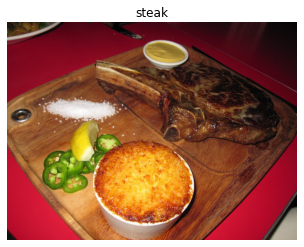

In [5]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [6]:
img.shape

(384, 512, 3)

In [7]:
img/255

array([[[0.10196078, 0.04313725, 0.05490196],
        [0.11372549, 0.05490196, 0.06666667],
        [0.13333333, 0.07843137, 0.0745098 ],
        ...,
        [0.02745098, 0.01960784, 0.02352941],
        [0.02745098, 0.01960784, 0.02352941],
        [0.02745098, 0.01960784, 0.02352941]],

       [[0.14901961, 0.08627451, 0.08627451],
        [0.1372549 , 0.07843137, 0.06666667],
        [0.1254902 , 0.07058824, 0.05882353],
        ...,
        [0.02745098, 0.01960784, 0.02352941],
        [0.02745098, 0.01960784, 0.02352941],
        [0.02745098, 0.01960784, 0.02352941]],

       [[0.18823529, 0.13333333, 0.09803922],
        [0.16078431, 0.10588235, 0.07058824],
        [0.12941176, 0.07058824, 0.04313725],
        ...,
        [0.02745098, 0.01960784, 0.02352941],
        [0.02745098, 0.01960784, 0.02352941],
        [0.02745098, 0.01960784, 0.02352941]],

       ...,

       [[0.10588235, 0.08235294, 0.08235294],
        [0.07058824, 0.05490196, 0.05098039],
        [0.05882353, 0

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense

model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid") # binary activation output
])

In [10]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [11]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=int(0.25*len(train_data)),
                        validation_data=valid_data,
                        validation_steps=int(0.1*len(valid_data)))


Epoch 1/2
11/11 [==============================] - 16s 1s/step - loss: 0.6929 - accuracy: 0.4971 - val_loss: 0.6856 - val_accuracy: 0.4375
Epoch 2/2
11/11 [==============================] - 15s 1s/step - loss: 0.6383 - accuracy: 0.7273 - val_loss: 0.5935 - val_accuracy: 0.8125


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [31]:
base_model=tf.keras.applications.ResNet101(include_top=False)
base_model.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(1,activation="sigmoid",name="output_layer")(x)

model_resnet_ft=tf.keras.Model(inputs,outputs)



In [32]:
model_resnet_ft.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [ ]:
history_resnet_ft =  model_resnet_ft.fit(train_data, 
                        epochs=2, 
                        steps_per_epoch=int(0.1*len(train_data)), 
                        validation_data=valid_data, 
                        validation_steps=int(0.1*len(valid_data)))

In [33]:
model_resnet_ft.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet101 (Functional)       (None, None, None, 2048)  42658176  
_________________________________________________________________
gap_layer (GlobalAveragePool (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 2049      
Total params: 42,660,225
Trainable params: 2,049
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
base_model.summary()

In [35]:
def model_trainable_layers(model):
    for layer_number, layer in enumerate(model.layers):
        print(layer_number, layer.name, layer.trainable, len(layer.trainable_variables))

In [36]:
model_trainable_layers(model_resnet_ft)

0 input_layer True 0
1 resnet101 True 416
2 gap_layer True 0
3 output_layer True 2


In [ ]:
base_model.trainable=True
model_trainable_layers(base_model)

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

model_trainable_layers(base_model)

In [39]:
model_resnet_ft.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet101 (Functional)       (None, None, None, 2048)  42658176  
_________________________________________________________________
gap_layer (GlobalAveragePool (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 2049      
Total params: 42,660,225
Trainable params: 4,467,713
Non-trainable params: 38,192,512
_________________________________________________________________


In [41]:
model_resnet_ft.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [42]:
history_resnet_ft2 = model_resnet_ft.fit(train_data,
                                        epochs=2,
                                        steps_per_epoch=int(0.1*len(train_data)),
                                        validation_data=valid_data,
                                        validation_steps=int(0.1*len(valid_data)))


Epoch 1/2
4/4 [==============================] - 65s 14s/step - loss: 0.7482 - accuracy: 0.5547 - val_loss: 0.6855 - val_accuracy: 0.5312
Epoch 2/2
4/4 [==============================] - 37s 9s/step - loss: 0.6795 - accuracy: 0.5781 - val_loss: 4.4890 - val_accuracy: 0.3750


In [43]:
model_resnet_ft.evaluate(train_data)

47/47 [==============================] - 289s 6s/step - loss: 3.5124 - accuracy: 0.5000


[3.51236629486084, 0.5]

In [44]:
history_resnet_ft2 = model_resnet_ft.fit(train_data,
                                        epochs=3,
                                        initial_epoch=history_resnet_ft2.epoch[-1],
                                        steps_per_epoch=int(0.2*len(train_data)),
                                        validation_data=valid_data,
                                        validation_steps=int(0.2*len(valid_data)))

Epoch 2/3
9/9 [==============================] - 91s 10s/step - loss: 0.6406 - accuracy: 0.6667 - val_loss: 3.9047 - val_accuracy: 0.4583
Epoch 3/3
9/9 [==============================] - 85s 10s/step - loss: 0.5936 - accuracy: 0.6944 - val_loss: 6.7664 - val_accuracy: 0.5417


In [45]:
model_resnet_ft.evaluate(train_data)

47/47 [==============================] - 232s 5s/step - loss: 7.2392 - accuracy: 0.5000


[7.239232540130615, 0.5]

In [50]:
model_resnet_ft.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [51]:
base_model.trainable=False



In [52]:
history_ft3=model_resnet_ft.fit(train_data,
                                        epochs=2,
                                        # initial_epoch=history_resnet_ft2.epoch[-1],
                                        steps_per_epoch=int(0.05*len(train_data)),
                                        validation_data=valid_data,
                                        validation_steps=int(0.05*len(valid_data)))

Epoch 1/2
2/2 [==============================] - 31s 9s/step - loss: 7.1018 - accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 17s 9s/step - loss: 7.1929 - accuracy: 0.4062


In [53]:
for layer in base_model.layers[-10:]:
    layer.trainable=True

model_trainable_layers(base_model)

0 input_5 False 0
1 conv1_pad False 0
2 conv1_conv False 0
3 conv1_bn False 0
4 conv1_relu False 0
5 pool1_pad False 0
6 pool1_pool False 0
7 conv2_block1_1_conv False 0
8 conv2_block1_1_bn False 0
9 conv2_block1_1_relu False 0
10 conv2_block1_2_conv False 0
11 conv2_block1_2_bn False 0
12 conv2_block1_2_relu False 0
13 conv2_block1_0_conv False 0
14 conv2_block1_3_conv False 0
15 conv2_block1_0_bn False 0
16 conv2_block1_3_bn False 0
17 conv2_block1_add False 0
18 conv2_block1_out False 0
19 conv2_block2_1_conv False 0
20 conv2_block2_1_bn False 0
21 conv2_block2_1_relu False 0
22 conv2_block2_2_conv False 0
23 conv2_block2_2_bn False 0
24 conv2_block2_2_relu False 0
25 conv2_block2_3_conv False 0
26 conv2_block2_3_bn False 0
27 conv2_block2_add False 0
28 conv2_block2_out False 0
29 conv2_block3_1_conv False 0
30 conv2_block3_1_bn False 0
31 conv2_block3_1_relu False 0
32 conv2_block3_2_conv False 0
33 conv2_block3_2_bn False 0
34 conv2_block3_2_relu False 0
35 conv2_block3_3_conv Fa

In [58]:
history_ft3=model_resnet_ft.fit(train_data,
                                        epochs=5,
                                        initial_epoch=4,
                                        steps_per_epoch=int(0.05*len(train_data)),
                                        validation_data=valid_data,
                                        validation_steps=int(0.1*len(valid_data)))

Epoch 5/5
2/2 [==============================] - 29s 21s/step - loss: 1.4059 - accuracy: 0.6406 - val_loss: 1.1101 - val_accuracy: 0.5312
